In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import glob
import nibabel as nib
import numpy as np
import itertools
from nilearn import plotting
from nilearn.image import new_img_like
from skimage import morphology

['/storage/workspace/hrichard/results/exp3/forrestsub13_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub14_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub15_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub16_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub17_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub18_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub19_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub20_BOLD_task001_run002_algoortho_test_score.nii',
 '/storage/workspace/hrichard/results/exp3/forrestsub12_BOLD_task001_run002_algoortho_test_score.nii']

/storage/workspace/hrichard/results/exp3/forrestsub13_BOLD_task001_run002_algoortho_test_score.nii
(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub14_BOLD_task001_run002_algoortho_test_score.nii


(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub15_BOLD_task001_run002_algoortho_test_score.nii
(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub16_BOLD_task001_run002_algoortho_test_score.nii


(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub17_BOLD_task001_run002_algoortho_test_score.nii


(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub18_BOLD_task001_run002_algoortho_test_score.nii


(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub19_BOLD_task001_run002_algoortho_test_score.nii


(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub20_BOLD_task001_run002_algoortho_test_score.nii
(132, 175, 48)
/storage/workspace/hrichard/results/exp3/forrestsub12_BOLD_task001_run002_algoortho_test_score.nii


(132, 175, 48)
9


(132, 175, 48)


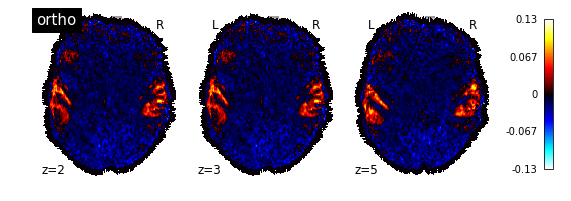

In [2]:
algorithms = ["ortho"]
avg_data = None
n = 0
for algorithm in algorithms:
    for path in glob.glob("/storage/workspace/hrichard/results/exp3/*.nii"):
        img = nib.load(path)
        print(path)
        print(img.shape)
        img_data = img.get_data()
        img_data[np.abs(img_data) > 0.5] = 0
        if avg_data is None:
            avg_data = img_data
            n = 1
        else:
            avg_data = (avg_data*n + img_data)/(n+1)
            n += 1
    print(n)
    print(avg_data.shape)
    
    plotting.plot_stat_map(new_img_like(img, avg_data),
                           display_mode="z",
                           cut_coords=[2,3,5], 
                           title = algorithm
                           )

(132, 175, 48)
(1957,)


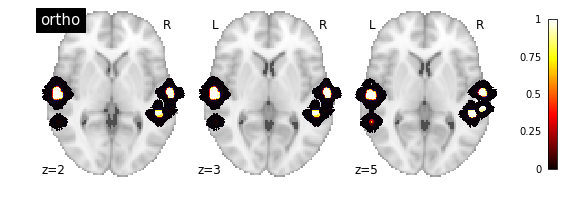

In [4]:
roi = avg_data.copy()
threshold = 0.045
roi[roi > threshold] = 1
roi[roi <= threshold] = 0
roi = morphology.closing(roi, selem = morphology.ball(3))
roi = morphology.opening(roi, selem = morphology.ball(3))
plotting.plot_stat_map(new_img_like(img, roi),
                           display_mode="z",
                           cut_coords=[2,3,5], 
                           title = algorithm
                           )
print(roi.shape)
print(roi[roi > 0].shape)
nib.save(new_img_like(img, roi), "/storage/workspace/hrichard/results/exp5/mask_forrest_roi2.nii.gz")